# 페이스북 광고 데이터 분석

- 분석은 ROAS 지표를 목표로. 
- 이 예비 분석은 추가 캠페인이 30-34 세 그룹, 특히 남성에 초점을 두어야한다는 것을 시사. 
- 광고비는 45-49 세 그룹을 대상으로하는 것이 가장 효과적입니다. 
- 그러나 이러한 결론과 관련된 클릭 수는 일부 경우에 낮으므로 이러한 그룹을 타겟팅 할 때 통계적으로 유의미한 것을 보여주는 추가 작업이 필요

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100

In [4]:
df = pd.read_csv("fbdata.csv")

In [5]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
df['CTR'] = (df['Clicks']/df['Impressions']*100)
df['CPC'] = df['Spent']/df['Clicks']

In [7]:
subset_df = df[['CTR', 'CPC', 'Approved_Conversion', 'Total_Conversion', 'Impressions', 'Spent', 'Clicks']].copy()

In [8]:
subset_df.head()

,CTR,CPC,Approved_Conversion,Total_Conversion,Impressions,Spent,Clicks
0,0.013605,1.43,1,2,7350,1.43,1
1,0.011198,0.91,0,2,17861,1.82,2
2,0.000000,NaN,0,1,693,0.00,0
3,0.023480,1.25,0,1,4259,1.25,1
4,0.024195,1.29,1,1,4133,1.29,1


## 클릭과 관련있는 변수들의 상관관계 시각화

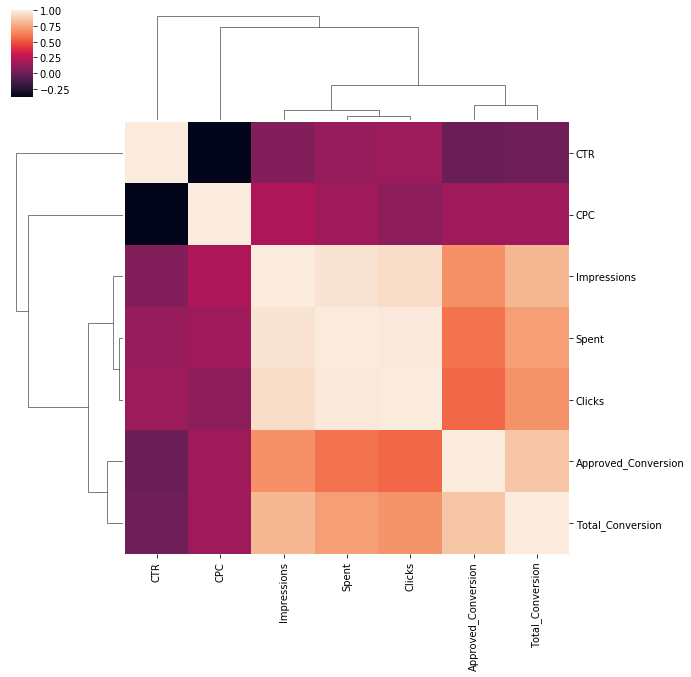

In [9]:
p1 = sns.clustermap(subset_df.corr())
p1

In [10]:
corr = subset_df.corr(method='pearson')#.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
corr

,CTR,CPC,Approved_Conversion,Total_Conversion,Impressions,Spent,Clicks
CTR,1.000000,-0.378854,-0.006602,0.010721,0.075914,0.140952,0.159290
CPC,-0.378854,1.000000,0.170040,0.160828,0.208556,0.165464,0.112676
Approved_Conversion,-0.006602,0.170040,1.000000,0.864034,0.684249,0.593178,0.559526
Total_Conversion,0.010721,0.160828,0.864034,1.000000,0.812838,0.725379,0.694632
Impressions,0.075914,0.208556,0.684249,0.812838,1.000000,0.970386,0.948514
Spent,0.140952,0.165464,0.593178,0.725379,0.970386,1.000000,0.992906
Clicks,0.159290,0.112676,0.559526,0.694632,0.948514,0.992906,1.000000


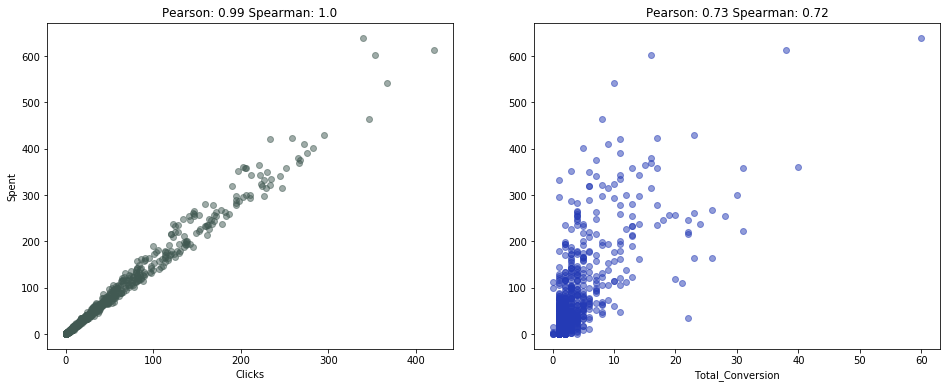

In [11]:

plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=2)

ax=ax.flatten()

cols = ['Clicks','Total_Conversion']
colors=['#415952', '#243AB5']#, '#243AB5','#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Spent')
    i.scatter(subset_df[cols[j]], subset_df['Spent'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%subset_df.corr().loc[cols[j]]['Spent'].round(2)+' Spearman: %s'%subset_df.corr(method='spearman').loc[cols[j]]['Spent'].round(2))
    j+=1


plt.show()

- 지출이 많을수록 더 많은 클릭이 발생하며 더 많은 전환이 발생
- 그러나 원하는 비즈니스 성과를 향상시키고이 경우 수익을 극대화하려면 실행 가능한 인사이트를 위해 여러 캠페인으로 분류하여 차례로 분석

In [12]:
 df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29


## 바이올린 플롯으로 캠페인별 분포 확인하기

- 캠페인 1178 이 광고비를 많이 소진했으니 더 깊게 살펴보자

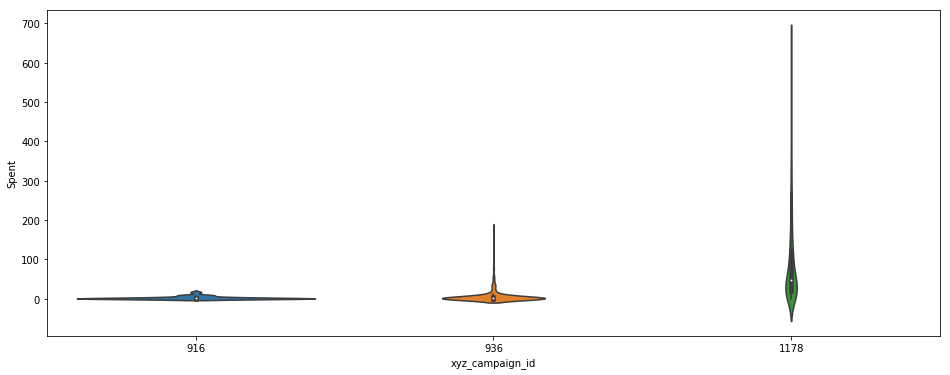

In [13]:
sns.violinplot(data = df, x='xyz_campaign_id', y='Spent' )

- 1178 캠페인만 필터링 해서 보자

In [32]:
cam_df = df[df['xyz_campaign_id'] ==1178]
print(cam_df.shape)
cam_df.head()

(625, 13)


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674


### 결측치
- 각 변수에 대한 결측 데이터의 백분율을 보여주는 아래 표에 표시된대로 결측 데이터의 양 확인
- 클릭 수와 지출이 0 인 NPC를 반환하는 CPC 변수에만 누락 된 값이 있음

In [33]:
columns = cam_df.columns
percentage_missing = cam_df.isnull().sum() * 100 / len(cam_df)
table_percentage_missing = pd.DataFrame({'column_name': columns,
                                 'percentage_missing': percentage_missing})

table_percentage_missing

,column_name,percentage_missing
ad_id,ad_id,0.00
xyz_campaign_id,xyz_campaign_id,0.00
fb_campaign_id,fb_campaign_id,0.00
age,age,0.00
gender,gender,0.00
interest,interest,0.00
Impressions,Impressions,0.00
Clicks,Clicks,0.00
Spent,Spent,0.00
Total_Conversion,Total_Conversion,0.00


### 전체 인구 통계학적 변수의 분포 확인

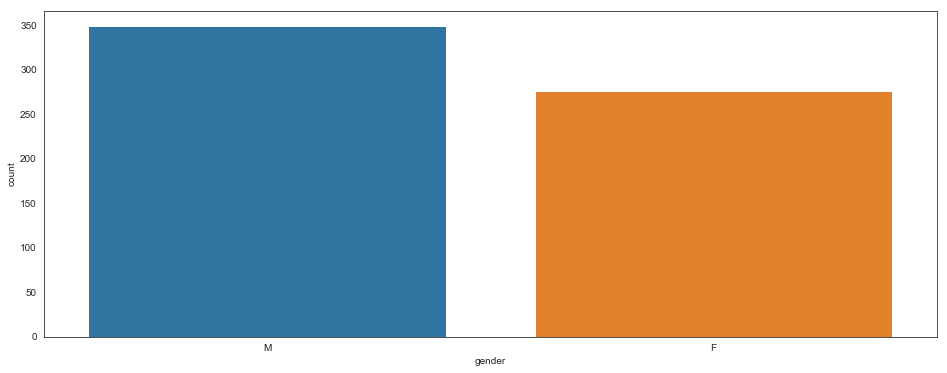

In [34]:
# load the tips dataset present by default in seaborn 
sns.set_style('white') 
sns.countplot(x ='gender', data = cam_df) 

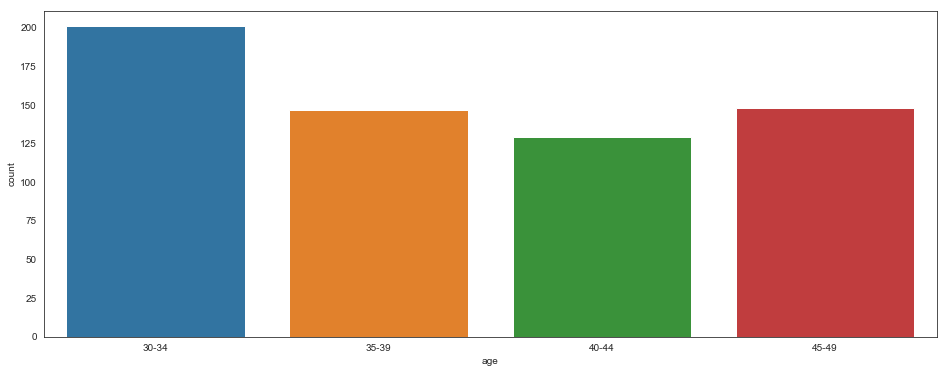

In [35]:
sns.countplot(x ='age', data = cam_df) 

- 사업 목표가 광고 비용으로 수익을 극대화하는 것이라면 ROAS 측정법이 매우 유용
- 전환 및 매출 금액을 알아야 됨
- 다음에서 전자는 5 파운드, 그 이후에는 100 파운드의 가치가 있다고 가정

In [51]:
import warnings
warnings.filterwarnings(action='ignore')

## 피쳐엔지니어링

In [70]:
cam_df['totConv'] = cam_df.loc[:,'Total_Conversion'] + cam_df.loc[:,'Approved_Conversion']
cam_df['conVal'] = cam_df['Total_Conversion']*5
cam_df['appConVal'] = cam_df['Approved_Conversion'] * 100
cam_df['totConvVal'] = cam_df['conVal'] + cam_df['appConVal']
cam_df['costPerCon'] = round(cam_df['Spent'] / cam_df['totConv'], 2)
cam_df['ROAS'] = round(cam_df['totConvVal'] / cam_df['Spent'], 2)
cam_df['CPM'] = round((cam_df['Spent'] / cam_df['Impressions']) * 1000, 2)
df5 = cam_df.head()
df5

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,totConv,conVal,appConVal,totConvVal,costPerCon,ROAS,CPM
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773,42,140,1400,1540,6.05,6.060000,0.21
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866,18,65,500,565,6.80,4.620000,0.19
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN,2,5,100,105,0.00,inf,0.00
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600,7,25,200,225,12.33,2.610000,0.19
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674,13,55,200,255,12.45,1.570000,0.22


- ROAS에 inf(infinity) 값이 들어간 의미는 클릭 수가 0이지만 전환이 발생하면 발생한 경우 
- 즉, 클릭이 추적되지 않았거나 다른 시간에 발생하여 다른 곳에서 발생한 것으로 인해 발생했을 수 있음
- 이 값을 NAN으로 변환하고 누락 된 데이터가 있는지 확인
- 이 데이터 변경 사항이 누락 된 데이터 수로 표시되는지 확인

In [88]:
df5['ROAS'] = df5['ROAS'].replace(np.inf,np.nan)
df5

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,totConv,conVal,appConVal,totConvVal,costPerCon,ROAS,CPM
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773,42,140,1400,1540,6.05,6.06,0.21
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866,18,65,500,565,6.80,4.62,0.19
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN,2,5,100,105,0.00,NaN,0.00
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600,7,25,200,225,12.33,2.61,0.19
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674,13,55,200,255,12.45,1.57,0.22


In [81]:
df5.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
CTR                    0
CPC                    1
totConv                0
conVal                 0
appConVal              0
totConvVal             0
costPerCon             0
ROAS                   1
CPM                    0
dtype: int64

In [87]:
columns = df5.columns

percentage_missing = df5.isnull().sum() * 100 / len(df5)
table_percentage_missing = pd.DataFrame({'column_name': columns,
                                 'percentage_missing': percentage_missing})

table_percentage_missing

,column_name,percentage_missing
ad_id,ad_id,0.0
xyz_campaign_id,xyz_campaign_id,0.0
fb_campaign_id,fb_campaign_id,0.0
age,age,0.0
gender,gender,0.0
interest,interest,0.0
Impressions,Impressions,0.0
Clicks,Clicks,0.0
Spent,Spent,0.0
Total_Conversion,Total_Conversion,0.0


## interest , age, gender 변수로 분석

- 매출을 극대화하기 위해 유사한 캠페인을 개선하기 위해 ROAS 측정 항목과 관련하여 데이터 세트에서 사용 가능한 변수 

### Analysis by gender
남녀의 Roas 를 박스플롯으로 확인



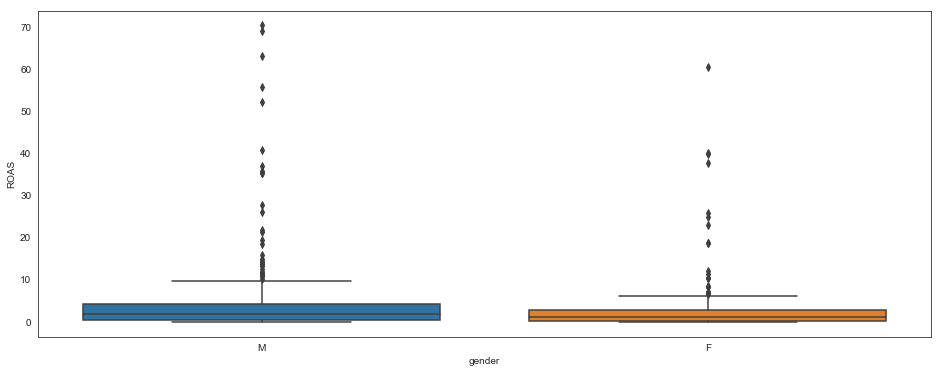

In [164]:
sns.boxplot(x="gender", y="ROAS",data=cam_df)
plt.show()

###  Analysis by interest

- ROAS 평균이 사용되지만 해당 값의 통졔적 유의성을 고려해야함
- 특정 그룹에 대해 클릭수가 많을 수록 클릭 수를 고려해 대락적으로 볼 수 있고 고객이 많을 수록 ROAS측정 항목을 신뢰 할 수 있음
- 이를 통해 101, 15, 21을 더 살펴보자

In [187]:
newdf_grouped_interest = cam_df[(cam_df['interest']==101) | (cam_df['interest']==15) | (cam_df['interest']==21) ]
newdf_grouped_interest['ROAS'] = newdf_grouped_interest['ROAS'].replace(np.inf,np.nan)
newdf_grouped_interest.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,totConv,conVal,appConVal,totConvVal,costPerCon,ROAS,CPM
523,1121097,1178,144532,30-34,M,15,30068,1,1.820000,1,0,0.003326,1.820000,1,5,0,5,1.82,2.75,0.06
524,1121098,1178,144532,30-34,M,15,1267550,123,236.769999,24,10,0.009704,1.924959,34,120,1000,1120,6.96,4.73,0.19
525,1121100,1178,144532,30-34,M,15,3052003,340,639.949998,60,17,0.011140,1.882206,77,300,1700,2000,8.31,3.13,0.21
526,1121101,1178,144532,30-34,M,15,29945,1,1.590000,2,1,0.003339,1.590000,3,10,100,110,0.53,69.18,0.05
527,1121102,1178,144532,30-34,M,15,357856,30,52.970000,7,3,0.008383,1.765667,10,35,300,335,5.30,6.32,0.15


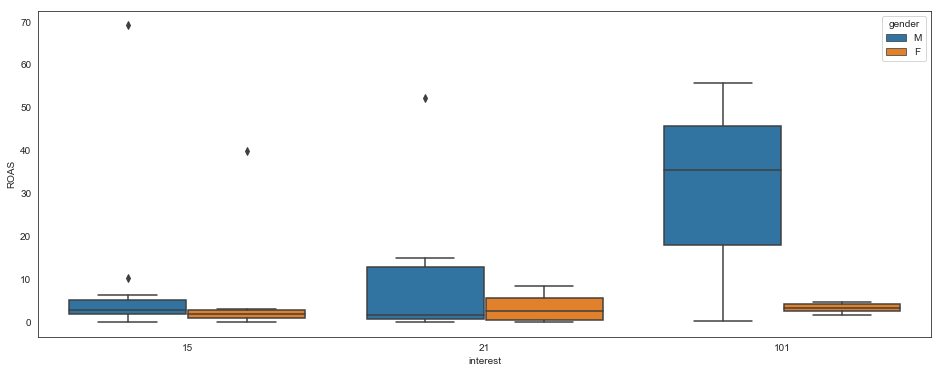

In [188]:
sns.boxplot(x="interest", y="ROAS",hue='gender',data=newdf_grouped_interest)
plt.show()

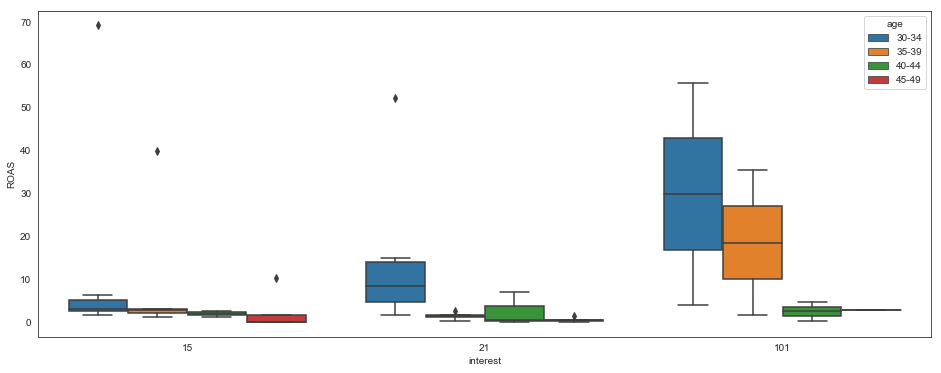

In [189]:
sns.boxplot(x="interest", y="ROAS",hue='age',data=newdf_grouped_interest)
plt.show()

- 이 plot은 30-34대에서 INTEREST 101의 남성에 초점을 맞추는 것이 ROAS 최대화에 가장 유리할 것임을 알 수 있음
- 그러나 이러한 플롯은 각 하위 그룹의 클릭 수를 고려하지 않으므로 조금 더 살펴보자

In [190]:
#grouped_gender = cam_df.groupby(['interest', 'gender']).agg({'ROAS': ['median', 'mean'], 'Clicks': 'sum'})
grouped_interest_gender = newdf_grouped_interest.groupby(['interest','gender']).agg({'ROAS':['median','mean'],'Clicks':'sum'}) 

#ravel 매서드를 사용하여 shape를 1차원 배열로 만들자
grouped_interest_gender.columns = ['_'.join(x) for x in grouped_interest_gender.columns.ravel()]
grouped_interest_gender = grouped_interest_gender.sort_values(by='ROAS_mean', ascending=False)
grouped_interest_gender['ROAS_mean'] = grouped_interest_gender['ROAS_mean'].replace(np.inf,0)
grouped_interest_gender

ROAS_median  ROAS_mean  Clicks_sum
interest gender                                    
101      M            35.470  30.526667          17
21       M             1.620   9.626000         200
15       M             2.790   8.893333         827
         F             1.980   6.382500         727
21       F             2.600   3.360000         293
101      F             3.405   3.275000         507

In [193]:
grouped_interest_age = newdf_grouped_interest.groupby(['interest','age']).agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
grouped_interest_age.columns = ['_'.join(x) for x in grouped_interest_age.columns.ravel()]
grouped_interest_age = grouped_interest_age.sort_values(by='ROAS_mean', ascending=False)
grouped_interest_age

ROAS_median  ROAS_mean  Clicks_sum
interest age                                      
101      30-34       29.870  29.870000          86
         35-39       18.515  18.515000         169
21       30-34        8.470  12.966667         163
15       30-34        3.005  11.618750         751
         35-39        2.830   9.788000         195
101      45-49        2.850   2.850000         107
21       40-44        0.520   2.536667          60
101      40-44        2.530   2.530000         162
15       45-49        0.150   2.402000         440
         40-44        1.940   1.940000         168
21       35-39        1.470   1.480000         109
         45-49        0.450   0.598000         161

- interest과 성별을 고려할 때 위의 표는 그룹 101에 관심이있는 남성에게 더 집중하는 것이 도움이 될 수 있음을 알 수 있음
- 그러나 클릭 수가 적 으면 ROAS 결과가 높을 수 있음
- 전반적으로, 각각의 관심 그룹 (101, 21, 15)이 고려 될 때, 남성으로부터 더 많은 수익이 발생

### Analysis by Age

In [195]:
grouped_age = cam_df.groupby('age').agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
# Using ravel, and a string join, we can create better names for the columns:
grouped_age.columns = ['_'.join(x) for x in grouped_age.columns.ravel()]
grouped_age = grouped_age.sort_values(by='ROAS_mean', ascending=0)
grouped_age.head(10)

,ROAS_median,ROAS_mean,Clicks_sum
age,,,
30-34,2.865,inf,9140
35-39,1.670,inf,6802
40-44,1.260,inf,7411
45-49,0.760,1.683311,12715


In [171]:
grouped_interest_age = newdf_grouped_interest.groupby(['interest','age']).agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
grouped_interest_age.columns = ['_'.join(x) for x in grouped_interest_age.columns.ravel()]
grouped_interest_age = grouped_interest_age.sort_values(by='ROAS_mean', ascending=False)

In [172]:
#grouped_gender = cam_df.groupby(['interest','gender']).agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
grouped_age_gender = cam_df.groupby(['age','gender']).agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
grouped_age_gender['ROAS'] = grouped_age_gender['ROAS'].replace(np.inf,np.nan)
grouped_age_gender.columns = ['_'.join(x) for x in grouped_age_gender.columns.ravel()]
grouped_age_gender['ROAS_mean'] = grouped_age_gender['ROAS_mean'].replace(np.nan,0)
grouped_age_gender = grouped_age_gender.sort_values(by='ROAS_mean', ascending=False)
grouped_age_gender

ROAS_median  ROAS_mean  Clicks_sum
age   gender                                    
35-39 F              1.42   2.518246        3929
45-49 M              0.96   2.091026        4247
40-44 F              0.85   1.957000        4919
45-49 F              0.58   1.229000        8468
30-34 F              2.43   0.000000        4877
      M              3.21   0.000000        4263
35-39 M              2.05   0.000000        2873
40-44 M              1.69   0.000000        2492

- 성별을 기준으로 그룹핑 하면 30-34 을 가장 중점을 둬야함
- 효율이 별로인 그룹은 45-49
- 연령대에 따른 성별은 interest 분석 결과보다 인사이트를 얻을 수 없음
- 관심사가 15,21,101 인 그룹에 집중